In [1]:
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
rows_count, col_count = 10000, 1
noise_strength = 4
w_1 = 5.2
w_2 = 3.4

np.random.seed(42)

X = 8 * np.random.rand(rows_count, 1) - 4

y = w_1 * X + w_2 * X**2
y = y.flatten()

y += np.random.normal(0, noise_strength, size=rows_count)

X = np.hstack((X, X**2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

In [3]:
from utils.linear_regression import mse, forward, train_linear_regressor

losses, parameters, gradients, current_parameters = train_linear_regressor(X_train, y_train, lr=0.017)

Epochs:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 0, loss: 741.865395
Epoch 1, loss: 442.378669
Epoch 2, loss: 267.734148
Epoch 3, loss: 165.462079
Epoch 4, loss: 105.292387
Epoch 5, loss: 69.711962
Epoch 6, loss: 48.555401
Epoch 7, loss: 35.900610
Epoch 8, loss: 28.283389
Epoch 9, loss: 23.668103
Epoch 10, loss: 20.852592
Epoch 11, loss: 19.123053
Epoch 12, loss: 18.053174
Epoch 13, loss: 17.386759
Epoch 14, loss: 16.968836
Epoch 15, loss: 16.705030
Epoch 16, loss: 16.537469
Epoch 17, loss: 16.430413
Epoch 18, loss: 16.361642
Epoch 19, loss: 16.317243
Epoch 20, loss: 16.288447
Epoch 21, loss: 16.269694
Epoch 22, loss: 16.257436
Epoch 23, loss: 16.249398
Epoch 24, loss: 16.244111
Epoch 25, loss: 16.240625
Epoch 26, loss: 16.238322
Epoch 27, loss: 16.236797
Epoch 28, loss: 16.235786
Epoch 29, loss: 16.235114
Epoch 30, loss: 16.234667


In [4]:
y_pred = forward(X_test, current_parameters)
y_pred = y_pred.flatten()

print(f'Mean Squared Error: {mse(y_test, y_pred)}')
print(f'Parameters: {current_parameters[0]}')

Mean Squared Error: 15.638133188355246
Parameters: [5.17319046 3.4135981 ]


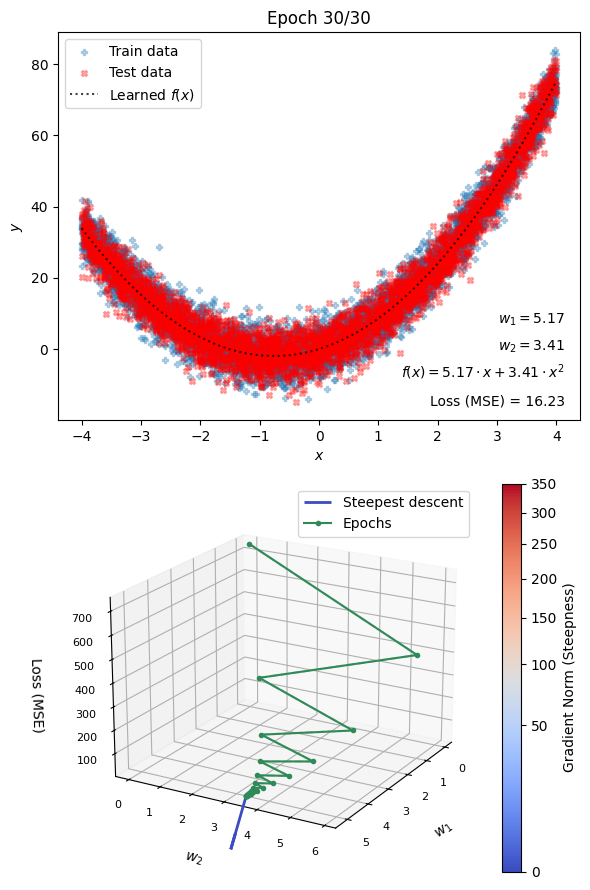

In [5]:
from matplotlib import pyplot as plt
from utils.plot_training import plot_training, plot_3D_loss
from utils.linear_regression import plot_2D_model

fig = plt.figure(figsize=(6, 9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, projection='3d')

ax2.view_init(elev=20, azim=30)

def plot_text(epoch_parameters, epoch_loss, text_w1, text_w2, text_fn, text_loss):
    text_w1.set_text(rf'$w_1 = {epoch_parameters[0]:.2f}$')
    text_w2.set_text(rf'$w_2 = {epoch_parameters[1]:.2f}$')
    text_fn.set_text(rf'$f(x) = {epoch_parameters[0]:.2f} \cdot x {epoch_parameters[1]:+.2f} \cdot x^2$')
    text_loss.set_text(f'Loss (MSE) = {epoch_loss:.2f}')

def plot_other():
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')

    ax1.legend(loc='upper left')
    
    ax2.set_xlabel(r'$w_1$', labelpad=10)
    ax2.set_ylabel(r'$w_2$', labelpad=10)
    ax2.set_zlabel('Loss (MSE)', labelpad=10)

    ax2.legend()

frame_buffers = plot_training(fig, ax1, ax2, losses, parameters, gradients, X_train, y_train, X_test, y_test,
    plot_2D_model,
    plot_3D_loss,
    plot_text,
    plot_other
)

In [6]:
from utils.plot_training import save_animation

experiment_name = '2D_polynomial_regression'
save_animation(frame_buffers, experiment_name)